# Uebung 2

In [2]:
import pandas as pd
import numpy  as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Aufgabe 6**

Betrachten Sie das einfache lineare Regressionsmodell
$$M : \text{Defekt}_i = β_0 + β_1 \text{Alter} _i + ϵ_i, i = 1, . . . , 13$$

Für glaukom.txt

**A:** Berechnen Sie die kleinste Quadrate Schätzer $\hat{β_0}$ und $\hat{β_1}$ und die Varianz-Kovarianz Matrix für die kleinsten Quadrate Schätzer $\hat{β_0}$ und $\hat{β_1}$.

In [3]:
glaukom = pd.read_csv('Glaukom.txt', sep='\t')

print(glaukom)

   lnr  Defekt  Flimmertest  Alter  Geschlecht
0    1     6.1         13.2     46           0
1    2     9.7         12.5     51           1
2    3     4.1         15.5     25           1
3    4     8.8         10.1     59           0
4    5     4.0         12.5     23           1
5    6     7.9         11.9     54           0
6    7     7.4          8.9     44           0
7    8     6.4         10.2     42           0
8    9    10.4          5.4     47           1
9   10    10.3          8.3     50           1


In Python können wir entweder Scikit-Learns LinearRegression oder Statsmodels benutzen. Für die direkte Bestimmung der Kovarianz ist Statsmodels jedoch besser geeignet, da es über eine interne Version dafür verfügt.

In [4]:
# Mit Statsmodels
defect, age = np.array(glaukom['Defekt']), np.array(glaukom['Alter'])
model_sm = sm.formula.ols(formula='Defekt ~ Alter', data=glaukom).fit()

coefficients = model_sm.params

cov_matrix = model_sm.cov_params()

print(f"Koeffizienten\n{coefficients}")
print(f"\nKovarianz-Matrix\n{cov_matrix}")

# Alternativ: Mit Scikit-Learn
X = age.reshape(-1, 1)
y = defect.reshape(-1, 1)

model = LinearRegression()
model.fit(X,y)

beta_0 = model.intercept_[0]
beta_1 = model.coef_[0]

print(f"\n\nMit Scikit-Learn: beta_0 = {beta_0}, beta_1 = {beta_1}")

Koeffizienten
Intercept    0.265026
Alter        0.164285
dtype: float64

Kovarianz-Matrix
           Intercept     Alter
Intercept   3.525277 -0.075187
Alter      -0.075187  0.001705


Mit Scikit-Learn: beta_0 = 0.26502563267963275, beta_1 = [0.16428513]


Die entstandene Kovarianz-Matrix hat die Form

$$
\begin{bmatrix}
Var(\hat{\beta_0)} & Cov(\hat{\beta_0}, \hat{\beta_1})
\\Cov(\hat{\beta_1}, \hat{\beta_0}) & Var(\hat{\beta_1)}
\end{bmatrix}
$$

**(nicht relevante) Anmerkung:** Formel für den Schätzer der Kovarianzmatrix für $\hat{β_0}$ und $\hat{β_1}$ aus der VL:

$$
\hat{Cov(\hat{β})} = \sigma ^2 (X^T X)^{-1}
$$

Wobei $\sigma ^2$ die Varianz unser $\epsilon$ ist

**B:** Sei
$$
\hat{y} = \hat{β_0} + \hat{β_0}x, x ∈ \mathbb{R}
$$

die Regressionsgerade für das Modell M. Berechnen Sie für jedes $x ∈ \mathbb{R}$
die Varianz des zugehörigen $\hat{y}$.

In [8]:
sigma_squared = model_sm.mse_resid
n = len(glaukom)
x_mean = glaukom['Alter'].mean()

def calculate_y_variance(x_value, X, sigma_squared, x_mean):
    return sigma_squared * (1/n + (x_value - x_mean)**2 / np.sum((X - x_mean)**2))

x_values = glaukom['Alter']
X = glaukom['Alter']
y_variances = [calculate_y_variance(x_val, X, sigma_squared, x_mean) for x_val in x_values]

for x_val, y_var in zip(x_values, y_variances):
    print(f"For x = {x_val}, Var(y) = {y_var}")

For x = 46, Var(y) = 0.21567321617978114
For x = 51, Var(y) = 0.2906899870249224
For x = 25, Var(y) = 0.8314927077539864
For x = 59, Var(y) = 0.5880291878293005
For x = 23, Var(y) = 0.9685688072073808
For x = 54, Var(y) = 0.37661828817481147
For x = 44, Var(y) = 0.2095354803833605
For x = 42, Var(y) = 0.21703715746787464
For x = 47, Var(y) = 0.223856863908342
For x = 50, Var(y) = 0.26886692641542675


2.095184311172593

**C:** Berechnen Sie das 99% Konfidenzintervall f¨ur ˆy.
Hinweis: Benutzen Sie die Formel
$CI95\% = \hat{y} ± t_{1−\frac{α}{2};df}\sqrt{Var(\hat{y})}.$
Wie viel Freiheitsgrade df hat das Modell M ?

In [48]:
df = n - 2

alpha = 0.01

t_critical = t.ppf(1-(alpha/2), df)

CI = t_critical * np.sqrt(y_variances)

print(f"df: {df}\nCI: {CI}")

df: 8
CI: [1.55826303 1.80907968 3.05965094 2.57301372 3.30223442 2.0591755
 1.53593008 1.56318258 1.58755167 1.73984817]


**D:** Die Grenzen des in der vorigen Teilaufgabe berechneten Konfidenzintervalls hängen von x ab. Zeichnen Sie die die Regressionsgerade zusammen mit den Datenpunkten und den Konfidenzintervallen in ein Streudiagramm ein. Da die Konfidenzintervalle von x abhängen, erhält man so
Konfidenzbänder für die Regressionsgerade.

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

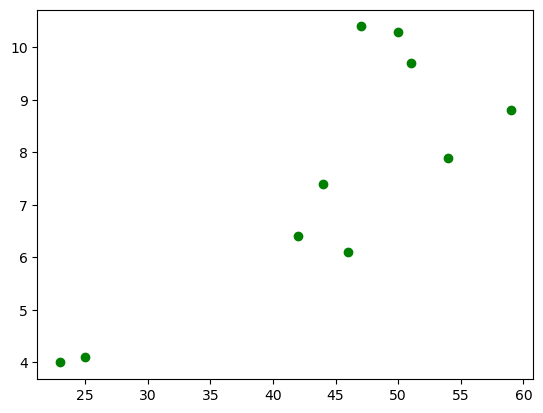

In [7]:
plt.scatter(age, defect, label="Datenpunkte", color="green")

y_pred = model.predict(X)

plt.plot(age,y_pred)

plt.show()


**Aufgabe 7**

Laden Sie den Datensatz in Schueler.txt in einen Datensatz.
Erstellen Sie den Teildatensatz Schule aller Schüler ab der neunten Klasse.

In [40]:
schueler = pd.read_csv("Schueler.txt", sep=" ")

schule = schueler[schueler['Klasse'] >= 9]

print(schule.head())

age = np.array(schule['Alter'])
height = np.array(schule['Groesse'])
cl = np.array(schule['Klasse'])
physics = np.array(schule['Physik'])
bio = np.array(schule['Bio'])
german = np.array(schule['Deutsch'])
maths = np.array(schule['Mathe'])

    lnr  Klasse Gesch  Alter  Groesse  Gewicht  Mathe  Physik  Deutsch  Bio
2     3      10     w     17      174       64      4     3.0        5    2
5     6       9     m     16      162       65      2     2.0        4    2
7     8      10     w     16      166       60      5     5.0        1    3
16   17       9     w     15      149       55      1     2.0        3    2
18   19      11     m     17      190       71      5     5.0        3    2


**A** Geben Sie für jedes der folgenden linearen Modelle mit Intercept die
vollständige Modellgleichung in mathematischer Schreibweise an. Alle
Modelle beziehen sich auf den Datensatz Schule.

$M_1 : Alter ∼ Klasse+Physik$

$M_2 : Alter ∼ Klasse+Physik+Bio$

$M_3 : Alter ∼ Klasse+Groeße$

$M_4 : Alter ∼ Physik+Mathe+Bio+Deutsch$

$M_5 : Alter ∼ Klasse$

Hinweis: Die Variablen Klasse, Physik, Bio, Deutsch und Mathe sollen
als kategoriale Variablen aufgefasst werden. Sie müssen daher vor ihrer
Verwendung in einem linearen Modell in Dummy-Variablen umkodiert
werden.

$M_1: Alter = \beta_0 + \beta_1 Klasse + \beta_2 Physik$

$M_2: Alter = \beta_0 + \beta_1 Klasse + \beta_2 Physik + \beta_3 Bio$

$M_3: Alter = \beta_0 + \beta_1 Klasse + \beta_2 Groeße$

$M_4: Alter = \beta_0 + \beta_1 Physik + \beta_2 Mathe + \beta_3 Bio + \beta_4 Deutsch$

$M_5: Alter = \beta_0 + \beta_1 Klasse$

Wobei $\beta_0$ jeweils das Intercept ist.

**B:** Welche der Modelle M1 bis M5 stehen in einem hierarchischen Verhältnis?

$M_5$ steht unter $M_1, M_2, M_3$, da die Koeffizienten von $x$ in $M_5$ eine Teilmenge von denen in den letzteren 3 sind.

$M_1$ steht wiederum unter $M_2$

$M_4$ steht für sich

**C:** Führen Sie für jedes Paar von Modellen $M_1$ bis $M_5$, die in einem hierarchischen Verhältnis stehen, den partiellen F-Test durch. Geben Sie insbesondere die Nullhypothesen, die Werte der F-Statistik mit Zähler- und Nennerfreiheitsgraden und die p-Werte an.

In [43]:
model_1 = sm.formula.ols(formula="Alter ~ C(Klasse) + C(Physik)", data=schule).fit()
model_2 = sm.formula.ols(formula="Alter ~ C(Klasse) + C(Physik) + C(Bio)", data=schule).fit()
model_3 = sm.formula.ols(formula="Alter ~ C(Klasse) + C(Groesse)", data=schule).fit()
model_4 = sm.formula.ols(formula="Alter ~ C(Physik) + C(Mathe) + C(Bio) + C(Deutsch)", data=schule).fit()
model_5 = sm.formula.ols(formula="Alter ~ C(Klasse)", data=schule).fit()

#M_5 steht "unter" M_1, M_2, M_3
print("M_5 < M_1")
print(sm.stats.anova_lm(model_5, model_1))
print("M_5 < M_2")
print(sm.stats.anova_lm(model_5, model_2))
print("M_5 < M_3")
print(sm.stats.anova_lm(model_5, model_3))

#M_1 steht "unter" M_2
print("M_1 < M_2")
print(sm.stats.anova_lm(model_1, model_2))

M_5 < M_1
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     439.0  143.121312      0.0       NaN       NaN       NaN
1     434.0  142.653927      5.0  0.467384  0.284387  0.921613
M_5 < M_2
   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     439.0  143.121312      0.0       NaN       NaN       NaN
1     429.0  140.504128     10.0  2.617184  0.799102  0.629711
M_5 < M_3
   df_resid         ssr  df_diff    ss_diff        F   Pr(>F)
0     439.0  143.121312      0.0        NaN      NaN      NaN
1     383.0  114.698176     56.0  28.423136  1.69483  0.00235
M_1 < M_2
   df_resid         ssr  df_diff  ss_diff         F    Pr(>F)
0     434.0  142.653927      0.0      NaN       NaN       NaN
1     429.0  140.504128      5.0   2.1498  1.312793  0.257415


Die wichtigen Werte sind

- F: Testet die Nullhypothese $H_0$, dass das "reduzierte" Modell ausreicht, um die Daten zu beschreiben, gegenüber der $H_1$, dass das volle Modell notwendig ist
- Pr(>F) ist unser p-Wert - also die Wahrscheinlichkeit, ein solches Ergebnis zu bekommen, unter der Annahme, dass unser $H_1$ wahr ist
- df_resid bezeichnet die Anzahl der Freiheitsgrade der jeweiligen Modelle, woebei df_diff die Differenz ist

**Aufgabe 8** Stellen Sie die studentisierten Residuen für jedes der Modelle aus
Aufgabe 7 in einem Q-Q Plot dar. Interpretieren Sie das Ergebnis.

In [ ]:
models = [model_1, model_2, model_3, model_4, model_5]
model_names = ["Modell 1", "Modell 2", "Modell 3", "Modell 4", "Modell 5"]

fig, axes = plt.subplots(5, 1, figsize=(8, 6*len(models)))

for i, (model, model_name) in enumerate(zip(models, model_names)):
    # Get the residuals
    residuals = model.resid
    
    # Create a Q-Q plot
    ax = axes[i] if len(models) > 1 else axes
    sm.qqplot(residuals, line='s', ax=ax)
    ax.set_title(f'Q-Q Plot of Residuals - {model_name}')

plt.tight_layout()
plt.show()


**Aufgabe 9**

Betrachten Sie den Datensatz in Glaukom.txt. Erstellen Sie die zusätzliche
Interaktionsvariable $Alter\cdot Geschlecht$ und betrachten Sie das lineare Modell
$Defekt_i = β_0+β_1Alter_i+β_2Geschlecht_i+β_3Alter_i∗Geschlecht_i+ϵ_i , i = 1, . . . , n$

Berechnen Sie den kleinsten Quadrate Schätzer für die Parameter $β_0, . . . , β_3$.
Welche Bedeutung haben die Parameter $β_0, . . . , β_3$?

Allgemein lassen sich $\beta_0,...,\beta_n$ mit dem Kleinste Quadrate-Verfahren wie folgt berechnen:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

In Python geht das wie folgt

In [ ]:
gender = np.array(glaukom['Geschlecht'])
age = np.array(glaukom['Alter'])
agegender = age*gender

X = np.column_stack((age, gender, agegender))

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_[0]
beta = model.coef_
beta
print(f"Beta 0,...,3:\n{intercept}\n{beta[0][0]}\n{beta[0][1]}\n{beta[0][2]}")

Zur Veranschaulichung der Formel kann man die Koeffizienten auch manuell berechnen

In [ ]:
# Erst extra Spalte mit Einsen einfügen (da beta_0 konstant)
X_with_intercept = np.column_stack((np.ones(len(age)), X))
# Die Formel von oben angewendet
coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

print(f"Beta 0,...,3:\n{coefficients}")

**Aufgabe 10**
**A:** Berechnen Sie für die Wahrscheinlichkeiten

(a) 0,5

(b) 0,9

(c) 0,1

(d) 0,01

(e) 0,001

die zugehörigen Odds (Chancen).

Es gilt für Odds:

$$
t = \frac{p}{1-p}
$$

Wir können das als Python Funktion ausdrücken

In [ ]:
def odds(prob):
    return prob/(1-prob)

a, b, c, d, e = odds(0.5), odds(0.9), odds(0.1), odds(0.01), odds(0.001)

print(f"a={a}\nb={b}\nc={c}\nd={d}\ne={e}")

**B:** Berechnen Sie für die Odds

(a) 0,005

(b) 9

(c) 10

(d) 0,1

(e) 100

die zugehörigen Wahrscheinlichkeiten

Es gilt für Wahrscheinlichkeiten:

$$
p = \frac{t}{1+t}
$$

Also gilt analog für die Funktion

In [ ]:
def prob(odds):
    return odds/(1-odds)

a, b, c, d, e = prob(0.005), prob(9), prob(10), prob(0.1), prob(100)

print(f"a={a}\nb={b}\nc={c}\nd={d}\ne={e}")

**C:** Kleine Wahrscheinlichkeiten p stimmen mit ihrem Odds gut überein. Wie
klein muss p sein, dass die relative Abweichung höchstens $0.1\%$ beträgt?

$\text{Gefragt: Relative Abweichung}\stackrel{!}{\le} 0.001$

$\text{Relative Abweichung}= \Bigg|\frac{p-\frac{\text{Erfolge}}{\text{Fehlschläge}}}{p} \Bigg| \cdot 100\% \stackrel{!}{\le} 0.1\%$

$=\Bigg|\frac{p-odds}{p}\Bigg| \cdot 1 \le 0.001$

Wahrscheinlichkeiten immer positiv

$= \frac{p-odds}{p} \le 0.001$

$=p-odds \le 0.001p$

$=-odds\le0.001p - p = -0.999p$

$odds \le 0.999p$

$\frac{odds}{0.999} \le p$